# Exercise on image recognition

## References

[1] Image library: https://www.microsoft.com/en-us/download/details.aspx?id=54765

[2] Francois Chollet, "Deep learning with Python", Manning Publications, 2017.

## Import libraries

In [194]:
import sys
sys.executable

'/Users/federicoboccardi/anaconda3/envs/PYTHON3.6/bin/python'

In [184]:
import os #this module provides a portable way of using operating system dependent functionality
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import cv2
#OpenCV, which is an image and video processing library.
#OpenCV is used for all sorts of image and video analysis, like facial recognition and detection, license plate reading, photo editing,
#advanced robotic vision, optical character recognition, and a whole lot more.
import keras
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,Convolution2D, MaxPooling2D, ZeroPadding2D, Conv1D, ZeroPadding1D
from keras.regularizers import *
from keras.optimizers import adam

In [185]:
#parameters
IMG_SIZE = 50
DATA_SIZE= 500
test_image_index=9
scaling_factor=255
tr_test_ratio=0.8
dr=0.35 #dropout

## Load and pre-process the data
Pre-processing includes: converting each image in a nparray, rescaling it to IMG_SIZExIMG_SIZE,convert it to FLOAT32 and scaling it by 255 (in order for each number to be between 0 and 1). 

### Load and pre-process the data

In [ ]:
path='/Users/federicoboccardi/Documents/DL and data science/exercises /transfer_learning/kagglecatsanddogs_3367a/PetImages'

# load all images in a directory
loaded_images = np.zeros([2*DATA_SIZE,IMG_SIZE,IMG_SIZE,3])
loaded_labels = np.zeros([2*DATA_SIZE,2]) #dog=[1,0], cat=[0,1]

i=0
print ('...loading dogs pictures')
for filename in os.listdir(path+'/Dog/'):
    if filename.endswith(".jpg"):
        # load image
        img_data = cv2.imread(path+'/Dog/' + filename) #image.imread open an image in a numpy array format
        try:
            # resize and convert to float32
            resized_img_data = np.float32(cv2.resize(img_data , dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_CUBIC))
            # scale
            resized_img_data = resized_img_data/scaling_factor
            # store loaded image in the list
            loaded_images[i,:,:,:]=resized_img_data
            # store loaded image in the label list
            loaded_labels[i,0]=1
            i=i+1
        except:
            print('this software version only supports images in a RGB format')
    if i>=DATA_SIZE: 
        break
print('total dogs pictures loaded:',i)
        
i=0
print ('...loading cats pictures')
for filename in os.listdir(path+'/Cat/'):
    if filename.endswith(".jpg"): 
        # load image
        img_data = image.imread(path+'/Cat/' + filename)
        # resize and convert to float32
        try:
            resized_img_data = np.float32(cv2.resize(img_data , dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_CUBIC))
            # scale
            resized_img_data = resized_img_data/scaling_factor
            # store loaded image in the list
            loaded_images[DATA_SIZE+i,:,:,:]=resized_img_data
            # store loaded image in the label list
            loaded_labels[DATA_SIZE+i,1]=1
            i=i+1
        except:
            print('this software version only supports images in a RGB format')
       
    if i>=DATA_SIZE: 
        break
print('total cats pictures loaded:',i)   

### Test

float64
(50, 50, 3)
[0.99607843 0.96078432 0.82745099]


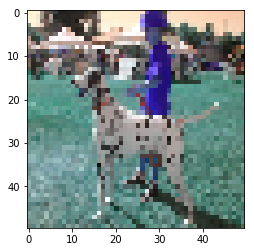

In [187]:
#summarize shape of the pixel array
print(loaded_images[test_image_index,:,:,:].dtype)
print(loaded_images[test_image_index,:,:,:].shape)
# display the array of pixels as an image
plt.imshow(loaded_images[test_image_index])
print(loaded_images[test_image_index,0,0,0:4])

### Create training set and test set

In [188]:
# Randomise the two lists "loaded_images" and "loaded_labels"
#https://pynative.com/python-random-shuffle/
positions = np.random.permutation(2*DATA_SIZE)
loaded_images= loaded_images[positions,:,:,:]
loaded_labels = loaded_labels[positions]
#Create training_set and test_set
tr_test_size=np.int(2*DATA_SIZE*tr_test_ratio)
images_tr_set=loaded_images[0:tr_test_size,:,:,:]
labels_tr_set=loaded_labels[0:tr_test_size]
images_test_set=loaded_images[tr_test_size:,:,:,:]
labels_test_set=loaded_labels[tr_test_size:]


### Test

label: [1. 0.]
size training set: 800
size test set: 200


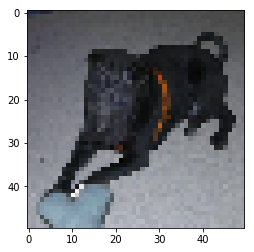

In [189]:
plt.imshow(loaded_images[test_image_index])
print('label:', loaded_labels[test_image_index])
print('size training set:', len(images_tr_set))
print('size test set:', len(images_test_set))

## Define and compile the network
 

In [190]:
keras.backend.clear_session()
cnn3=keras.models.Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))
cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))
cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))
cnn3.add(Flatten())
cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(2, activation='sigmoid'))

cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

cnn3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
__________

## Train the network

### Training

In [ ]:
history=cnn3.fit(images_tr_set,labels_tr_set,epochs=40, batch_size=256,validation_split=0.1)

## Plot the loss and accuracy for training and validation sets

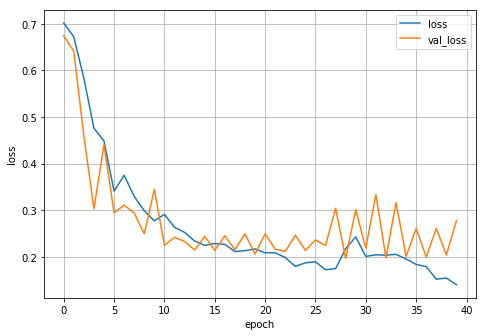

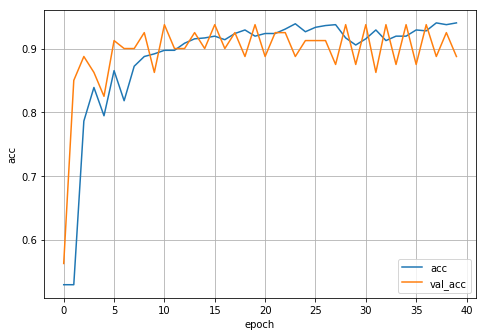

In [192]:
loss=np.array(history.history['loss'])
acc=history.history['acc']
val_loss=history.history['val_loss']
val_acc=history.history['val_acc']


fig1=plt.figure()
fig2=plt.figure()


axes1=fig1.add_axes([0,0,1,1])
axes2=fig2.add_axes([0,0,1,1])
axes1.plot(loss,label='loss')
axes2.plot(acc,label='acc')
axes1.plot(val_loss,label='val_loss')
axes2.plot(val_acc,label='val_acc')
axes1.set_xlabel('epoch')
axes1.set_ylabel('loss')
axes1.legend()
axes1.grid(b=True,axis='both')
axes2.set_xlabel('epoch')
axes2.set_ylabel('acc')
axes2.legend()
axes2.grid(b=True,axis='both')

## Run the model for the test set (inference)

In [193]:
#test the model on the training set
[loss,accuracy]=cnn3.evaluate(images_test_set,labels_test_set)
print ('loss:',loss)
print ('accuracy:',accuracy)

200/200 [==============================] - 1s 3ms/step
loss: 0.255935400724411
accuracy: 0.905
